In [1]:
import pandas as pd

# Step 1: Load the Excel file
file_path = "/kaggle/input/seriesmatrix/GSE26712_series_matrix.xlsx"  # Replace with your actual file path
data = pd.read_excel(file_path)

# Step 2: Save the data to a CSV file
csv_file_path = "GSE26712_SeriesMatrix.csv"  # Specify the output CSV file path
data.to_csv(csv_file_path, index=False)  # Save without the index

print(f"File converted to CSV and saved as {csv_file_path}")


File converted to CSV and saved as GSE26712_SeriesMatrix.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import quantile_transform
import os

# Step 1: Specify the input and output file paths
input_file = '/kaggle/working/GSE26712_SeriesMatrix.csv'  # Replace with your input CSV file
output_file = 'GSE26712_log_quantile_normalized_data.csv'  # Output CSV file

# Step 2: Check if the input file exists
if not os.path.exists(input_file):
    raise FileNotFoundError(f"Input file '{input_file}' not found. Please check the path.")

# Step 3: Read the microarray dataset from the CSV file
microarray_data = pd.read_csv(input_file)

# Ensure the "ID_REF" column exists
if "ID_REF" not in microarray_data.columns:
    raise ValueError("'ID_REF' column not found in the dataset. Ensure the dataset has this column.")

# Set the "ID_REF" column as the index
microarray_data.set_index("ID_REF", inplace=True)

# Step 4: Handle non-positive values before log2 transformation
if (microarray_data <= 0).any().any():
    print("Warning: Dataset contains non-positive values. Adding a small constant (1e-5) to the data.")
    microarray_data += 1e-5  # Make all values strictly positive

# Apply log2 transformation
log2_transformed_data = np.log2(microarray_data)

# Step 5: Perform quantile normalization on the log2-transformed data
quantile_normalized_data = quantile_transform(
    log2_transformed_data, 
    n_quantiles=min(50, log2_transformed_data.shape[0]),  # Adjust n_quantiles to data size
    axis=0, 
    random_state=0, 
    copy=True
)

# Step 6: Convert the normalized data back to a DataFrame
quantile_normalized_df = pd.DataFrame(
    quantile_normalized_data, 
    columns=microarray_data.columns, 
    index=microarray_data.index
)

# Step 7: Write the normalized data to a new CSV file
quantile_normalized_df.to_csv(output_file)

print(f"Normalized data has been saved to '{output_file}'")


Normalized data has been saved to 'GSE26712_log_quantile_normalized_data.csv'


In [4]:
import pandas as pd

# Step 1: Load the two CSV files
file1 = '/kaggle/input/merging-needed-datasets/GSE26712_log_quantile_normalized_data.csv'  # Replace with the actual filename
file2 = '/kaggle/input/merging-needed-datasets/combined_DEG_Filtered_GSE26712.csv'  # Replace with the actual filename

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Step 2: Perform an inner join on 'ID_REF' from df1 and 'ID' from df2
merged_df = pd.merge(df1, df2, left_on='ID_REF', right_on='ID', how='inner')

# Step 3: Save the merged result to a new CSV file
output_file = 'merged_GSE26712.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved as '{output_file}'")


Merged file saved as 'merged_GSE26712.csv'


In [7]:
import pandas as pd

# Step 1: Load the CSV file
input_file = '/kaggle/input/fresh-dataset-for-class-0-and-1/merged_GSE18520_fresh.csv'  # Replace with your actual file name
output_file = 'merged_GSE18520_fresh_with_class.csv'

df = pd.read_csv(input_file, index_col="ID_REF")  # Set ID_REF as index

# Step 2: Create the "Class" row
class_values = []  # List to store class values

for column in df.columns:
    if 'GSM462652' <= column <= 'GSM462643':  # Check if column falls in range
        class_values.append(0)
    else:
        class_values.append(1)

# Step 3: Append the new "Class" row at the bottom
df.loc["Class"] = class_values

# Step 4: Save the modified DataFrame to a new CSV file
df.to_csv(output_file)

print(f"Updated CSV file saved as '{output_file}'")


Updated CSV file saved as 'merged_GSE18520_fresh_with_class.csv'


In [2]:
import pandas as pd

# Step 1: Load the CSV file
input_file = '/kaggle/input/ready-to-transpose/merged_GSE26712_fresh_with_class.csv'  # Replace with your actual file name
output_file = 'transposed_merged_GSE26712_fresh_with_Class.csv'

df = pd.read_csv(input_file, index_col=0)  # Set first column as index

# Step 2: Transpose the DataFrame
df_transposed = df.T

# Step 3: Save the transposed data to a new CSV file
df_transposed.to_csv(output_file)

print(f"Transposed CSV file saved as '{output_file}'")


Transposed CSV file saved as 'transposed_merged_GSE26712_fresh_with_Class.csv'


**APPLYINNG mRMR**

In [3]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Read the transposed dataset (ensure the file path is correct)
data = pd.read_csv('/kaggle/input/for-model-apply/transposed_merged_GSE26712_new.csv')

# Ensure all features are numeric (except the last column, which is the class)
data.iloc[:, :-1] = data.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

# Convert the class label (last column) to a numeric value
data['Class'] = data['Class'].astype('category').cat.codes

# Separate features and target
X = data.iloc[:, :-1]  # All columns except the last one (features)
y = data['Class']      # Last column as target (class)

# Calculate mutual information for all features
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store features and their scores
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': mi_scores
}).sort_values(by='Score', ascending=False)

# Select the top 4520 features based on scores
top_features = mi_scores_df.head(1610)['Feature'].tolist()

# Subset the original dataset for the selected features and include the class label
selected_data = data[top_features + ['Class']]

# Save the selected features and class label to a CSV file
selected_data.to_csv('GSE26712_selected_features_with_class.csv', index=False)

# Save features with their scores to another CSV file
mi_scores_df.head(1610).to_csv('GSE26712_selected_1610_features_with_scores.csv', index=False)

# Confirm that the files have been saved
print("Selected features and their expression values with class label saved to 'GSE26712_selected_features_with_class.csv'.")
print("Selected features and their scores saved to 'GSE26712_selected_1610_features_with_scores.csv'.")

Selected features and their expression values with class label saved to 'GSE26712_selected_features_with_class.csv'.
Selected features and their scores saved to 'GSE26712_selected_1610_features_with_scores.csv'.


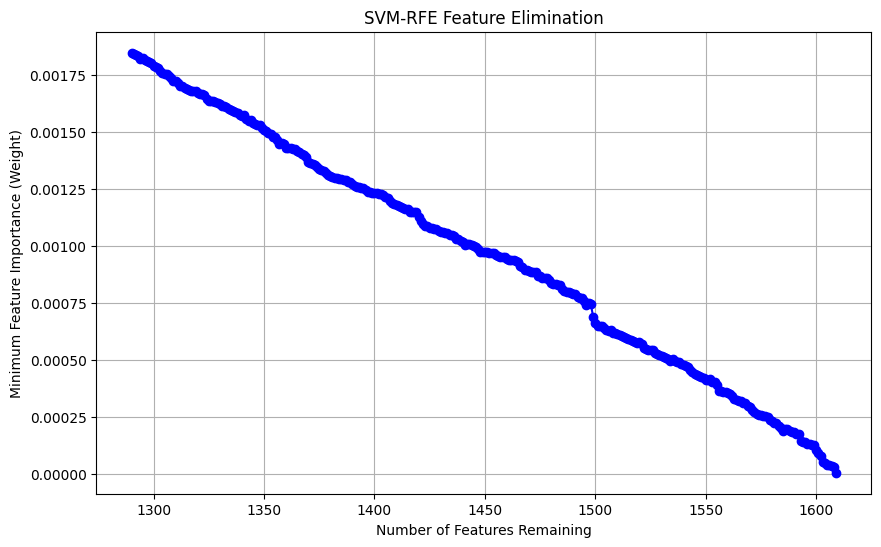

Selected features saved to 'selected_features_svm_rfe.csv'.
Transposed selected features saved to 'GSE26712_selected_features_svm_rfe_nontransposed.csv'.


In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("/kaggle/working/GSE26712_selected_features_with_class.csv")

# Ensure all features are numeric (excluding the last column, which is the class)
X = data.iloc[:, :-1].apply(pd.to_numeric)

# Convert the class label to a numeric category
y = data['Class'].astype('category').cat.codes

# SVM-RFE function with visualization
def svm_rfe_plot(X, y, num_features_to_select):
    # Initialize variables
    remaining_features = list(X.columns)
    ranking = []
    num_features_remaining = []
    min_weights = []
    
    while len(remaining_features) > num_features_to_select:
        # Train SVM with linear kernel
        svc = SVC(kernel="linear", C=1.0)
        svc.fit(X[remaining_features], y)
        
        # Compute feature weights (absolute values of the coefficients)
        weights = np.abs(svc.coef_).flatten()
        
        # Identify the least important feature
        least_important_feature = remaining_features[np.argmin(weights)]
        
        # Remove the least important feature
        remaining_features.remove(least_important_feature)
        
        # Update the ranking and tracking variables
        ranking.append(least_important_feature)
        num_features_remaining.append(len(remaining_features))
        min_weights.append(np.min(weights))
    
    # Add remaining features to the ranking
    ranking.extend(remaining_features)
    
    # Plot the feature elimination process
    plt.figure(figsize=(10, 6))
    plt.plot(num_features_remaining, min_weights, marker="o", color="blue")
    plt.xlabel("Number of Features Remaining")
    plt.ylabel("Minimum Feature Importance (Weight)")
    plt.title("SVM-RFE Feature Elimination")
    plt.grid()
    plt.show()
    
    # Return the top features
    top_features = ranking[-num_features_to_select:]
    return top_features

# Apply SVM-RFE and visualize
num_features_to_select = 1290  # Change this to the number of features you want to select
selected_features = svm_rfe_plot(X, y, num_features_to_select)

# Extract the selected features along with the class label
selected_data = data[selected_features + ['Class']]

# Save the selected features to a CSV file
selected_data.to_csv("GSE26712_selected_features_svm_rfe.csv", index=False)

print("Selected features saved to 'selected_features_svm_rfe.csv'.")

# Transpose the dataset and save it
selected_data_transposed = selected_data.T
selected_data_transposed.to_csv("GSE26712_selected_features_svm_rfe_nontransposed.csv", index=True)

print("Transposed selected features saved to 'GSE26712_selected_features_svm_rfe_nontransposed.csv'.")


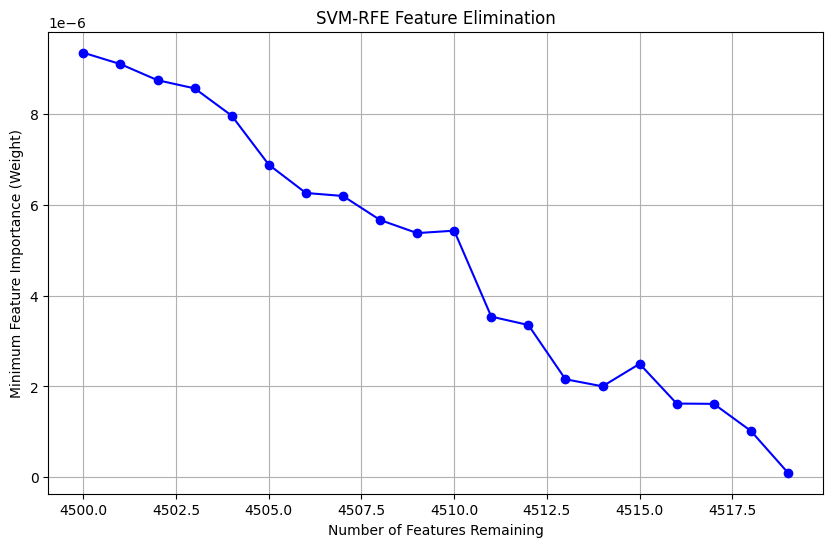

In [9]:
selected_all = svm_rfe_plot(X,y,4500)


✅ Dataset '/kaggle/input/ready-to-transpose/merged_GSE26712_fresh_with_class.csv' loaded successfully.


ValueError: ❌ Error: The dataset must contain a 'Class' column.

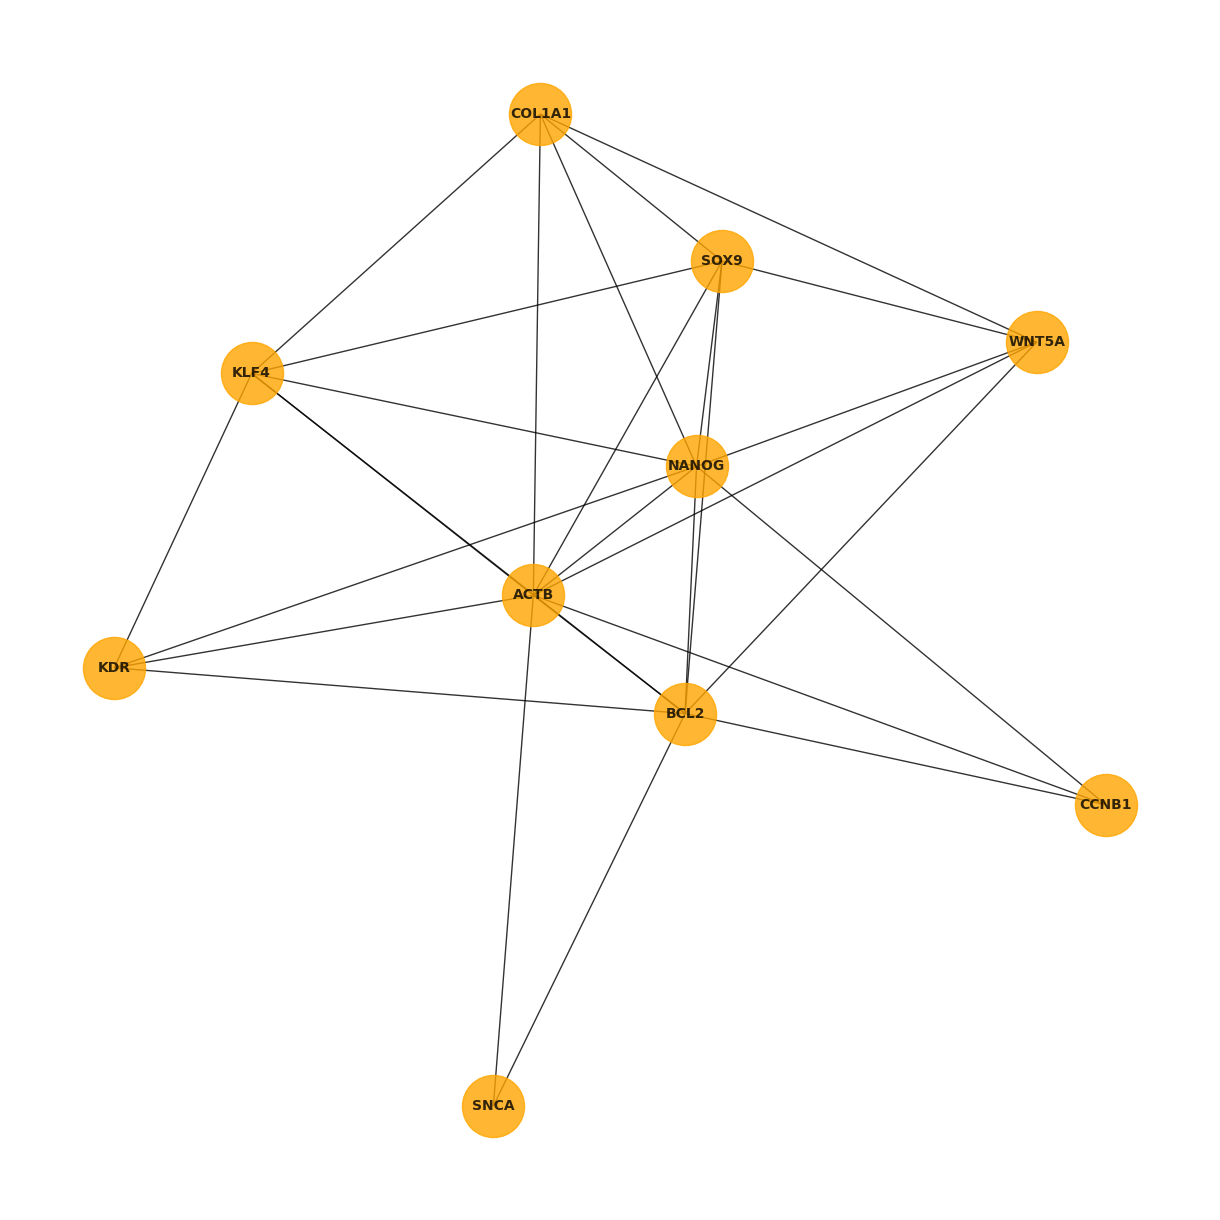

✅ Graph saved as network_graph.png


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# File path to your SIF file
file_path = "/kaggle/input/sif-to-img/string_interactions_short.tsv_Degree_top10_with_shortest_paths.sif"  # Update this with the correct path

# Read the .sif file and extract edges
edges = []
with open(file_path, "r") as f:
    for line in f:
        parts = line.strip().split("\t")  # Use tab as the delimiter
        if len(parts) == 3:  # Ensure correct format (Source - Interaction - Target)
            node1, interaction, node2 = parts
            edges.append((node1, node2))  # Ignore the interaction type

# Create a graph from edges
G = nx.Graph()
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color='orange', edge_color='black', 
        node_size=2000, font_size=10, font_weight="bold", alpha=0.8)

# Save as a PNG image
output_path = "network_graph.png"
plt.savefig(output_path, format="png", dpi=300)
plt.show()

print(f"✅ Graph saved as {output_path}")
